In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Installing `caer` and `canaro` since they don't come pre-installed
!pip install --upgrade caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 34.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 44.0 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 34.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing i

In [3]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
#pylint:disable=no-member (Removes linting problems with cv)

In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'sideshow_bob',
 'apu_nahasapeemapetilon',
 'kent_brockman',
 'comic_book_guy',
 'edna_krabappel',
 'nelson_muntz',
 'lenny_leonard',
 'mayor_quimby',
 'waylon_smithers',
 'maggie_simpson',
 'groundskeeper_willie',
 'barney_gumble',
 'selma_bouvier',
 'carl_carlson',
 'ralph_wiggum',
 'patty_bouvier',
 'martin_prince',
 'professor_john_frink',
 'snake_jailbird',
 'cletus_spuckler',
 'rainier_wolfcastle',
 'simpsons_dataset',
 'agnes_skinner',
 'sideshow_mel',
 'otto_mann',
 'fat_tony',
 'gil',
 'miss_hoover',
 'disco_stu',
 'troy_mcclure',
 'lionel_hutz']

In [7]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.8857877254486084s
[INFO] At 1000 files
[INFO] 1454 files found in 0.3030061721801758s
[INFO] At 1000 files
[INFO] 1452 files found in 0.20506906509399414s
[INFO] At 1000 files
[INFO] 1354 files found in 0.15657329559326172s
[INFO] At 1000 files
[INFO] 1342 files found in 0.24450993537902832s
[INFO] At 1000 files
[INFO] 1291 files found in 0.1537635326385498s
[INFO] At 1000 files
[INFO] 1206 files found in 0.07822585105895996s
[INFO] At 1000 files
[INFO] 1194 files found in 0.04592084884643555s
[INFO] At 1000 files
[INFO] 1193 files found in 0.06684541702270508s
[INFO] At 1000 files
[INFO] 1079 files found in 0.00969076156616211s
[INFO] 986 files found in 0.007335662841796875s
[INFO] 913 files found in 0.0034515857696533203s
[INFO] 877 files found in 0.0034151077270507812s
[INFO] 623 files found in 0

In [8]:
# Number of training samples
len(train)

41866

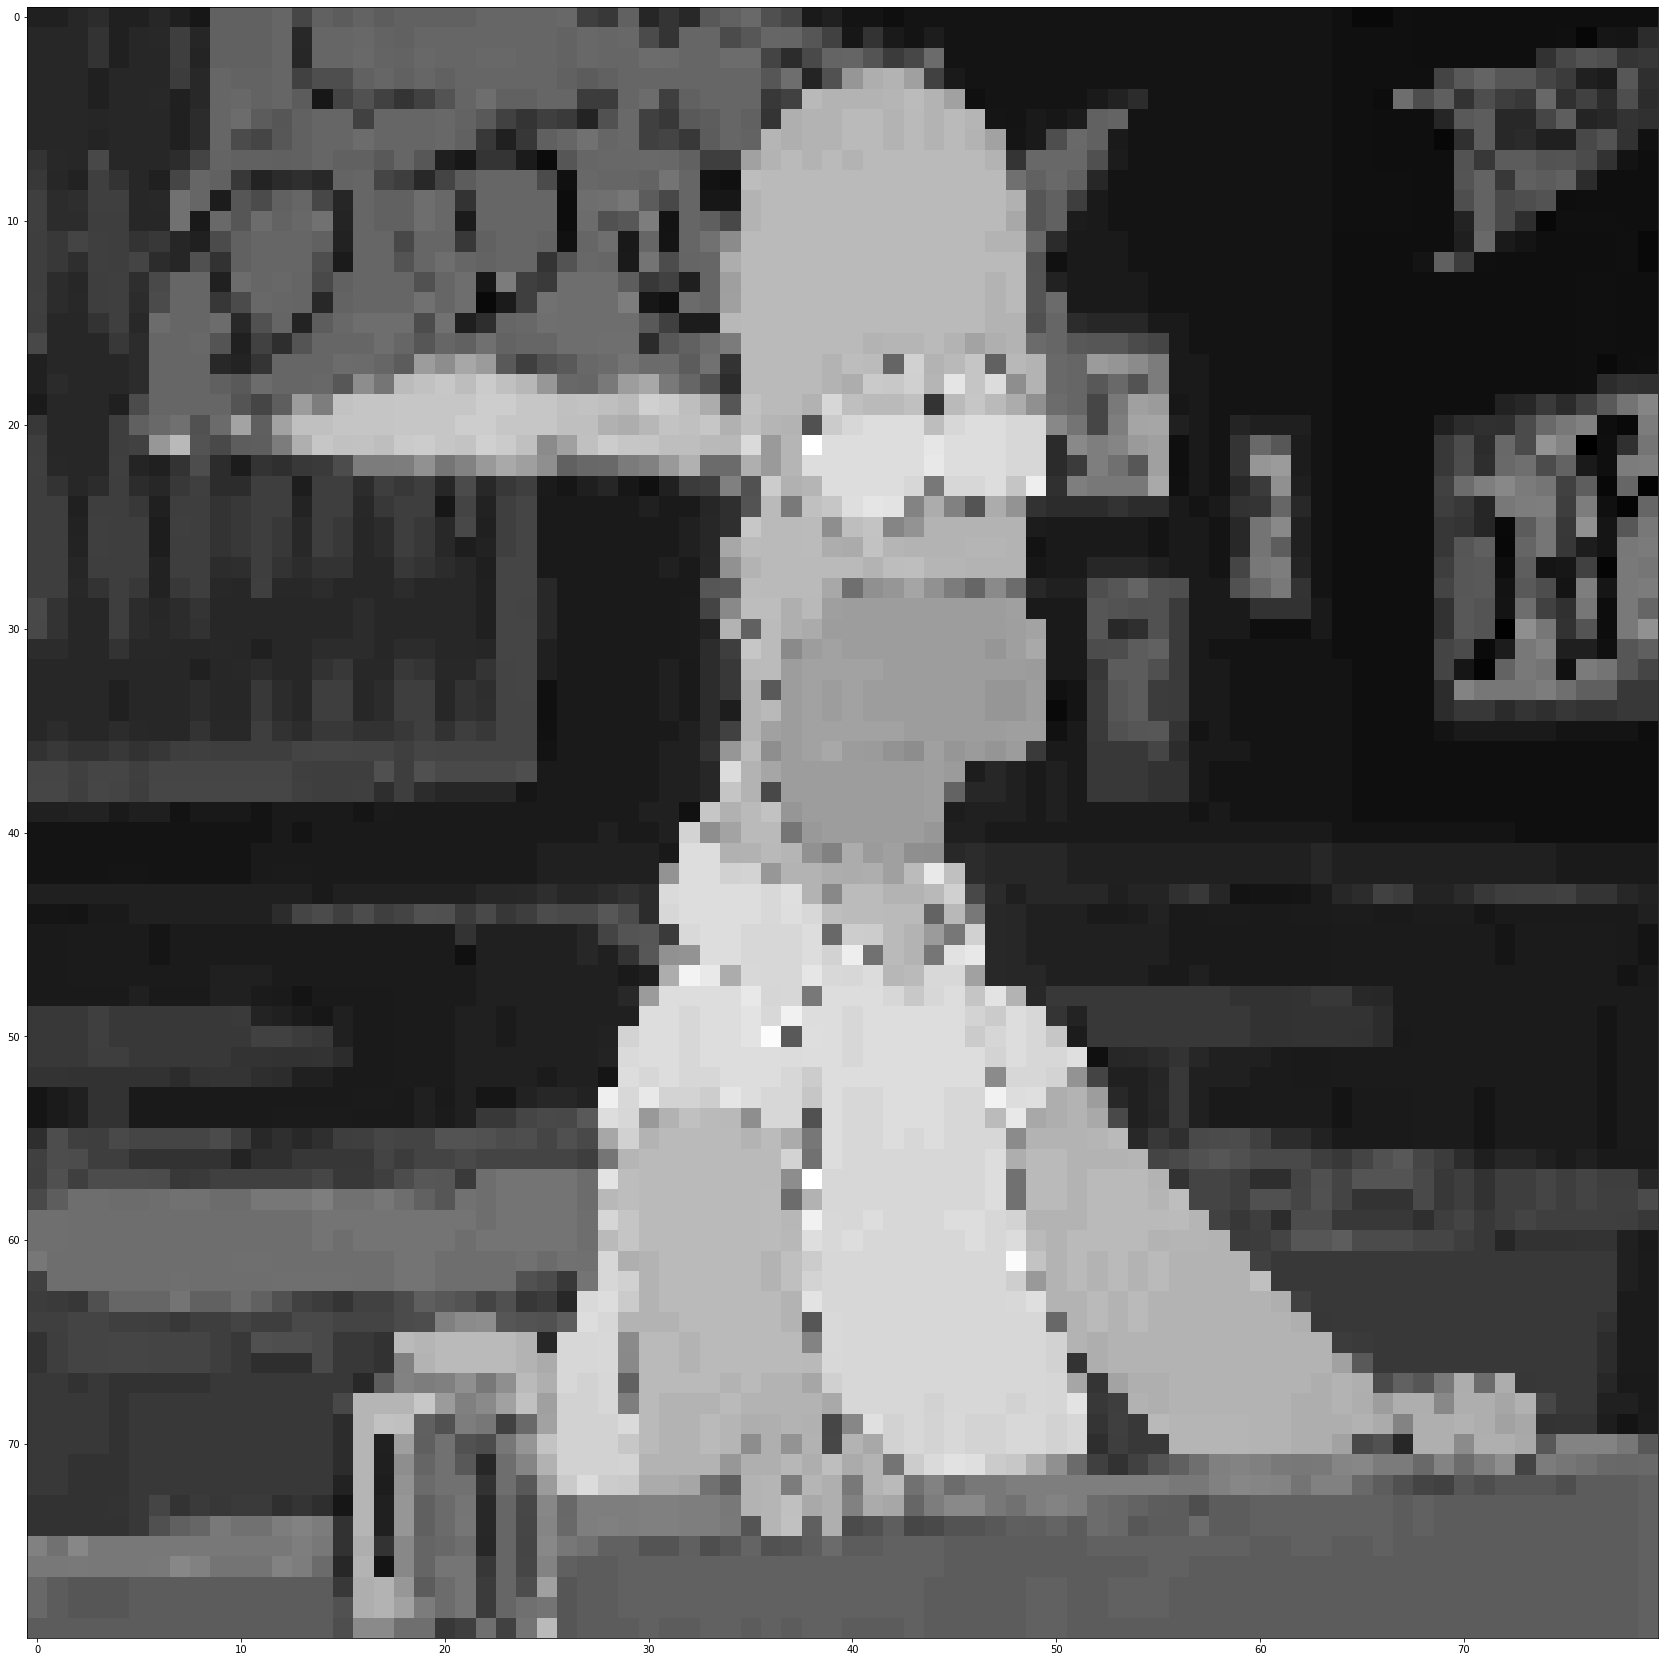

In [9]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [10]:
# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [12]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [13]:
del train
del featureSet
del labels
gc.collect()

23

In [14]:
# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

In [15]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [16]:
# Create our model (returns a compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters),
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [18]:
# Training the model

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
1046/1046 [==============================] - 38s 29ms/step - loss: 0.0866 - accuracy: 0.4907 - val_loss: 0.0768 - val_accuracy: 0.5009
Epoch 2/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0726 - accuracy: 0.4998
Epoch 3/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0724 - accuracy: 0.4998
Epoch 4/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0723 - accuracy: 0.4997
Epoch 5/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0722 - accuracy: 0.4997
Epoch 6/10
1046/1046 [==============================] - 28s 26ms/step - loss: 0.0722 - accuracy: 0.4998
Epoch 7/10
1046/1046 [==============================] - 28s 27ms/step - loss: 0.0721 - accuracy: 0.4998
Epoch 8/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0721 - accuracy: 0.4997
Epoch 9/10
1046/1046 [==============================] - 27s 26ms/step - loss: 0.0721 - accuracy: 0.4997
Epoch 10/10
1046/1046 

In [19]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'sideshow_bob',
 'apu_nahasapeemapetilon',
 'kent_brockman',
 'comic_book_guy',
 'edna_krabappel',
 'nelson_muntz',
 'lenny_leonard',
 'mayor_quimby',
 'waylon_smithers',
 'maggie_simpson',
 'groundskeeper_willie',
 'barney_gumble',
 'selma_bouvier',
 'carl_carlson',
 'ralph_wiggum',
 'patty_bouvier',
 'martin_prince',
 'professor_john_frink',
 'snake_jailbird',
 'cletus_spuckler',
 'rainier_wolfcastle',
 'simpsons_dataset',
 'agnes_skinner',
 'sideshow_mel',
 'otto_mann',
 'fat_tony',
 'gil',
 'miss_hoover',
 'disco_stu',
 'troy_mcclure',
 'lionel_hutz']

# Testing the model

In [ ]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

simpsons_dataset


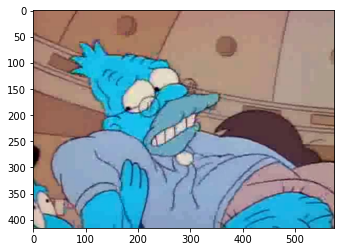

In [41]:
test_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg'

img = cv.imread(test_path)
predictions = model.predict(prepare(img))
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

plt.imshow(img)
plt.show()

simpsons_dataset


In [26]:
np.argmax(predictions[0])


33

In [34]:
characters.index("simpsons_dataset")

33